In [23]:
import sys,platform,os

import matplotlib
from matplotlib import pyplot as plt
import numpy as np

_camb_path=os.path.join(os.path.abspath('.'),'CAMB')
sys.path.insert(0,_camb_path)

import camb
print('Using CAMB %s installed at %s' %(camb.__version__,os.path.dirname(camb.__file__)))

import camb.symbolic as cs

Using CAMB 1.5.4 installed at /Users/marigalla/AstroCosmoComputational/Students/MariaLuisaGallavotti/CAMB/camb


## Parameters
* `H0`: The present-day value of the Hubble constant in units of km/s/Mpc.
* `ombh2`: The physical density of baryons multiplied by the square of the Hubble constant, denoted as $\Omega_b h^2$.
* `omch2`: The physical density of cold dark matter (CDM) multiplied by the square of the Hubble constant, denoted as $\Omega_c h^2$.
* `mnu`: The sum of the neutrino masses, typically given in eV.
* `omk`: The curvature of the universe.
* `tau`: The optical depth to reionization.
* `As`: The amplitude of primordial scalar fluctuations, typically represented by AsA_sAs​ or AAA.
* `ns`: The spectral index of primordial scalar fluctuations.
* `halofit_version`: Specifies which version of the HALOFIT nonlinear matter power spectrum model to use.
* `lmax`: The maximum value of multipole moment for which to compute the CMB power spectrum.

In [24]:
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)
pars2 = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0.1, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)
pars3 = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.01,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

results = camb.get_results(pars)
results2 = camb.get_results(pars2)
results3 = camb.get_results(pars3)

# Background Cosmology

## Distances
### Angular Diameter Distance

Text(0.5, 1.0, 'Angular diameter distance')

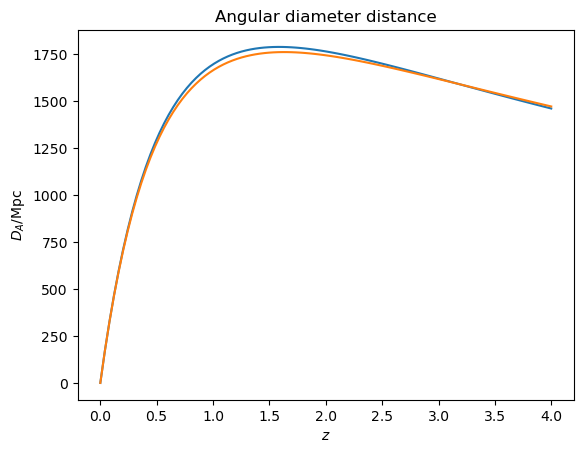

In [25]:
z = np.linspace(0,4,100)
DA = results.angular_diameter_distance(z)
plt.plot(z, DA)
plt.xlabel('$z$')
plt.ylabel(r'$D_A /\rm{Mpc}$')
plt.title('Angular diameter distance')

DA2 = results2.angular_diameter_distance(z)
plt.plot(z, DA2)
plt.xlabel('$z$')
plt.ylabel(r'$D_A /\rm{Mpc}$')
plt.title('Angular diameter distance')

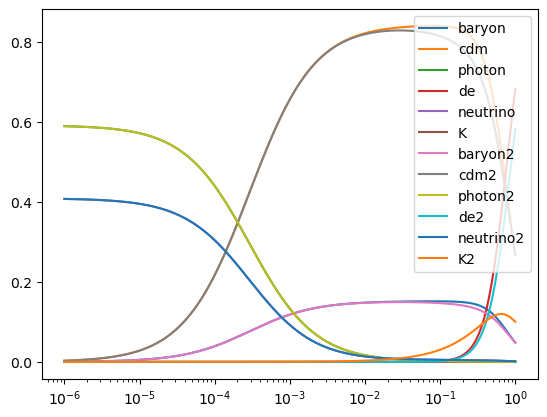

In [26]:
a=np.logspace(-6,0,1000)
densities=results.get_background_densities(a)
densities2=results2.get_background_densities(a)

plt.plot(a,densities['baryon']/densities['tot'],label='baryon')
plt.plot(a,densities['cdm']/densities['tot'],label='cdm')
plt.plot(a,densities['photon']/densities['tot'],label='photon')
plt.plot(a,densities['de']/densities['tot'],label='de')
plt.plot(a,(densities['neutrino']+densities['nu'])/densities['tot'],label='neutrino')
plt.plot(a,densities['K']/densities['tot'],label='K')

plt.plot(a,densities2['baryon']/densities2['tot'],label='baryon2')
plt.plot(a,densities2['cdm']/densities2['tot'],label='cdm2')
plt.plot(a,densities2['photon']/densities2['tot'],label='photon2')
plt.plot(a,densities2['de']/densities2['tot'],label='de2')
plt.plot(a,(densities2['neutrino']+densities2['nu'])/densities2['tot'],label='neutrino2')
plt.plot(a,densities2['K']/densities2['tot'],label='K2')

plt.legend()
plt.xscale('log')

# Thermodynamics

In [27]:
a=np.logspace(-6,0,1000)
z=1/a-1
background=results.get_background_redshift_evolution(z)
background3=results3.get_background_redshift_evolution(z)

Text(0.5, 1.0, 'Ionization History')

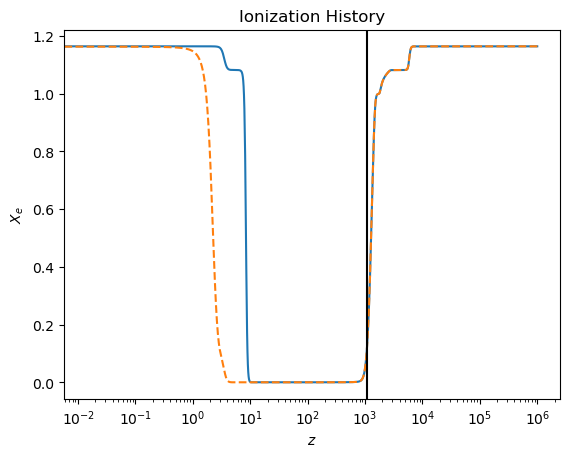

In [28]:
plt.plot(z,background['x_e'])
plt.plot(z,background3['x_e'],linestyle='--')
plt.axvline(results.get_derived_params()['zstar'],color='k')
plt.xlabel('$z$')
plt.ylabel('$X_e$')
plt.xscale('log')
plt.title('Ionization History')

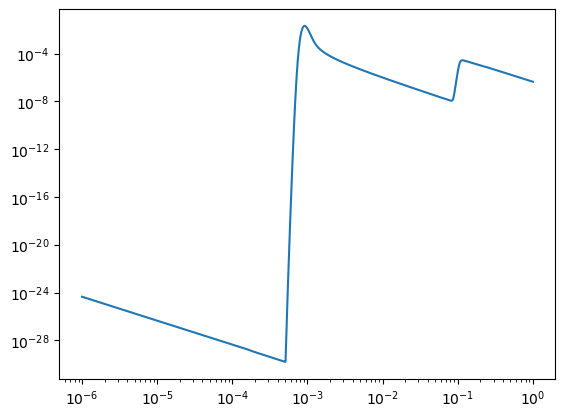

In [29]:
plt.plot(a,background['visibility'])
plt.xscale('log')
plt.yscale('log')

The two peaks are for recombination and reionization.

# Perturbations

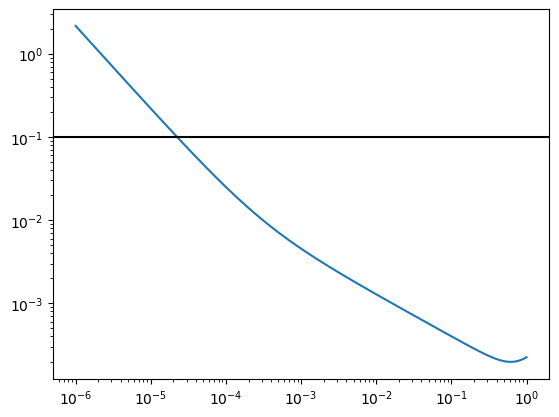

In [30]:
_time_evolution=results.get_redshift_evolution(0.1,z,vars=['k/h','a','H','delta_cdm','delta_photon','Weyl'])

_k=0.1
plt.plot(a,_time_evolution[:,2])
plt.axhline(_k,color='k')
plt.xscale('log')
plt.yscale('log')

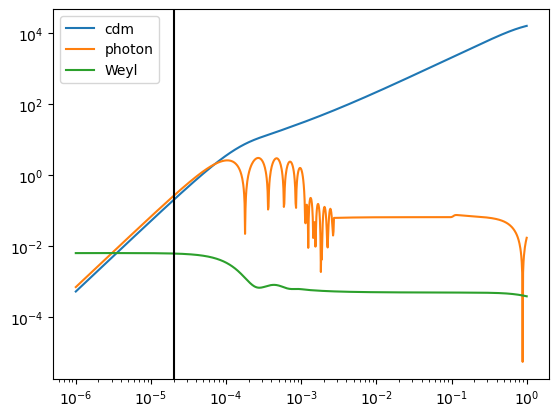

In [31]:
plt.plot(a,np.abs(_time_evolution[:,3]),label='cdm')
plt.plot(a,np.abs(_time_evolution[:,4]),label='photon')
plt.plot(a,np.abs(_time_evolution[:,5]),label='Weyl')
plt.axvline(2.e-5,color='k')

plt.legend()
plt.xscale('log')
plt.yscale('log')

horizon entry -> k/h and H of the same order

In [32]:
#Delta_c_N = cs.make_frame_invariant(cs.Delta_c, 'Newtonian')
#ev=results.get_time_evolution(_k, z, vars=['delta_cdm',Delta_c_N])
#plt.figure(figsize=(6,4))
#plt.loglog(a,ev[:,0])
#plt.loglog(a,ev[:,1])
#plt.title(r'$k= %s/\rm{Mpc}$'%k)
#plt.xlabel(r'$\eta/\rm{Mpc}$');
#plt.legend([r'$\Delta_c^{\rm synchronous}$', r'$\Delta_c^{\rm Newtonian}$'], fontsize=14);

## CMB Lensing Potential Power

CMB lensing refers to the gravitational distortion of the cosmic microwave background (CMB) radiation caused by the large-scale structure (LSS) of the universe. These lensing effects arise due to the gravitational influence of matter, such as dark matter and ordinary matter, along the line of sight between the observer and the last scattering surface of the CMB.

The main lensing effects on the CMB include:

1. **Gravitational Lensing**: Massive objects in the universe, such as galaxies, galaxy clusters, and dark matter halos, act as gravitational lenses. They bend the paths of CMB photons as they travel through the universe, causing them to be deflected from their original trajectories. This deflection distorts the observed patterns of the CMB temperature and polarization anisotropies.

2. **Smoothing of Acoustic Peaks**: CMB temperature anisotropies arise from the acoustic oscillations of the photon-baryon fluid in the early universe. Gravitational lensing smoothes out these acoustic peaks by redistributing the CMB photons, leading to a damping of the peaks in the observed temperature power spectrum.

3. **B-mode Polarization**: Gravitational lensing induces a specific type of polarization pattern in the CMB known as B-mode polarization. This polarization arises from the curl component of the lensing-induced deflection field and provides valuable insights into the distribution of matter in the universe and the physics of inflation.

4. **Shear and Magnification**: Gravitational lensing also introduces distortions in the shapes and sizes of distant galaxies observed through weak gravitational lensing techniques. These distortions, known as shear and magnification, provide information about the matter distribution and the expansion history of the universe.

Overall, CMB lensing effects provide a powerful tool for probing the large-scale structure of the universe, testing cosmological models, and constraining fundamental parameters such as the amplitude of matter fluctuations and the nature of dark energy.

This is the plot of the CMB lensing potential power spectra for various values of the equation of state parameter $w$ at a fixed value of the Hubble constant ($H_0$). 

In [33]:
'''
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(As=2e-9, ns=0.965)
pars.set_for_lmax(2000, lens_potential_accuracy=1)

ws = np.linspace(-1.5, -0.6, 5)
for w in ws:
    pars.set_dark_energy(w=w, wa=0, dark_energy_model='fluid') 
    results = camb.get_results(pars)
    cl = results.get_lens_potential_cls(lmax=2000)
    plt.loglog(np.arange(2001), cl[:,0])

plt.legend([f'$w = {w:.3f}$' for w in ws])
plt.ylabel('$[L(L+1)]^2C_L^{\phi\phi}/2\pi$')
plt.xlabel('$L$')
plt.xlim([2,2000]);
'''

"\npars = camb.CAMBparams()\npars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)\npars.InitPower.set_params(As=2e-9, ns=0.965)\npars.set_for_lmax(2000, lens_potential_accuracy=1)\n\nws = np.linspace(-1.5, -0.6, 5)\nfor w in ws:\n    pars.set_dark_energy(w=w, wa=0, dark_energy_model='fluid') \n    results = camb.get_results(pars)\n    cl = results.get_lens_potential_cls(lmax=2000)\n    plt.loglog(np.arange(2001), cl[:,0])\n\nplt.legend([f'$w = {w:.3f}$' for w in ws])\nplt.ylabel('$[L(L+1)]^2C_L^{\\phi\\phi}/2\\pi$')\nplt.xlabel('$L$')\nplt.xlim([2,2000]);\n"

Text(0.5, 1.0, 'Matter Power Spectrum at different redshifts (with BAO)')

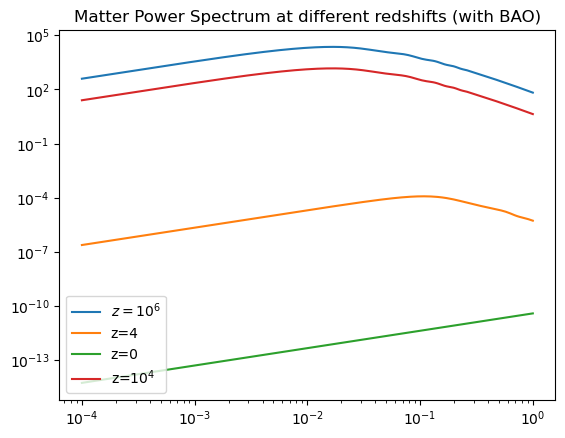

In [44]:
pars.set_matter_power(redshifts=[1.e6, 1.e4, 4.0, 0.], kmax=10.0) #kmax in (Mpc)^-1
pars.NonLinear = 0
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

plt.plot(kh,pk[0],label='$z=10^6$')
plt.plot(kh,pk[2],label='z=4')
plt.plot(kh,pk[3],label='z=0')
#plt.plot(kh,pk[0]/pk[1])
plt.plot(kh,pk[1],label='z=$10^4$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Matter Power Spectrum at different redshifts (with BAO)')

**To Do**: transform these power spectra in correlation functions. sei troppo diligente!!

In [45]:
results.get_sigma8()

array([1.05646453e-07, 1.49578482e-04, 2.03698981e-01, 8.03156288e-01])

## CMB Transfer Functions

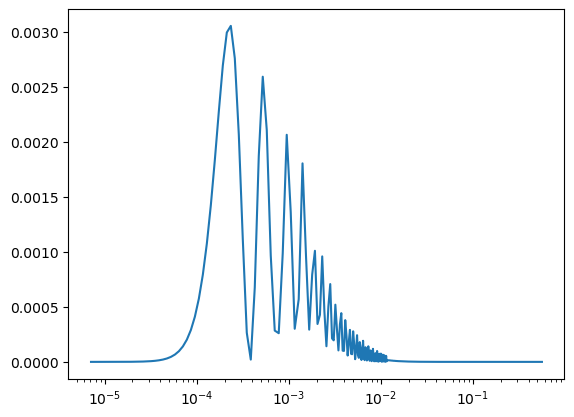

In [54]:
pars.set_accuracy(AccuracyBoost=1)
transfer = results.get_cmb_transfer_data()
#transfer.__dict__
ell=2
idx=list(transfer.L).index(2)
plt.plot(transfer.q,transfer.delta_p_l_k[0,idx,:]**2)
plt.xscale('log')
#plt.yscale('log')

In log log scale at a certain point CAMB approximates the function using the mean of the oscillations.

ValueError: x and y must have same first dimension, but have shapes (2,) and (3049,)

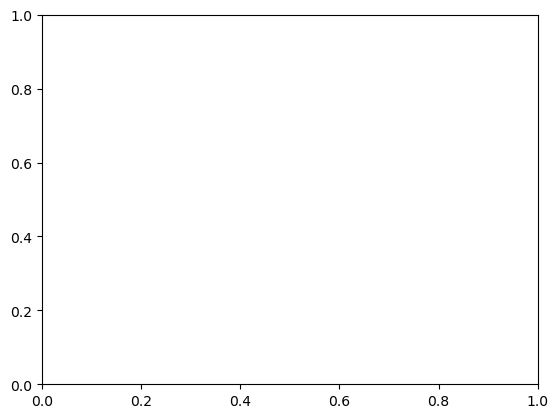

In [61]:
powers=results.get_cmb_power_spectra(pars,CMB_unit='muK')
ls=np.arange(powers['total'].shape[0])

plt.plot(ls[:2],powers['total'][2:,0])
plt.xscale('log')

# New Physics Search: Dark Energy

w, wa model parameters:

 class: <DarkEnergyPPF>
 w = -0.7
 wa = -1.0
 cs2 = 1.0
 use_tabulated_w = False
 


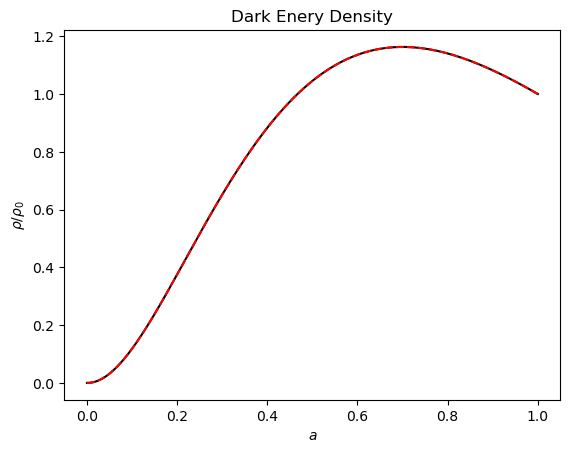

In [73]:
from camb.dark_energy import DarkEnergyPPF, DarkEnergyFluid

w0=-0.7
wa=-1.0

pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)
pars4 = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=-0.1, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

pars.DarkEnergy = DarkEnergyPPF(w=w0, wa=wa)
pars4.DarkEnergy = DarkEnergyPPF(w=w0, wa=wa)
print('w, wa model parameters:\n\n', pars.DarkEnergy)
results = camb.get_background(pars)
results4 = camb.get_background(pars4)

#or can also use a w(a) numerical function 
#(note this will slow things down; make your own dark energy class in fortran for best performance)
a = np.logspace(-5, 0, 1000)
w = w0 + wa * (1 - a)

rho, _ = results.get_dark_energy_rho_w(a)
rho4, _ = results4.get_dark_energy_rho_w(a)
plt.plot(a, rho, color='k')
plt.plot(a, rho4, color='r', ls='--')
plt.ylabel(r'$\rho/\rho_0$')
plt.xlabel('$a$')
plt.title('Dark Enery Density');

Text(0.5, 1.0, 'Matter Power Spectrum')

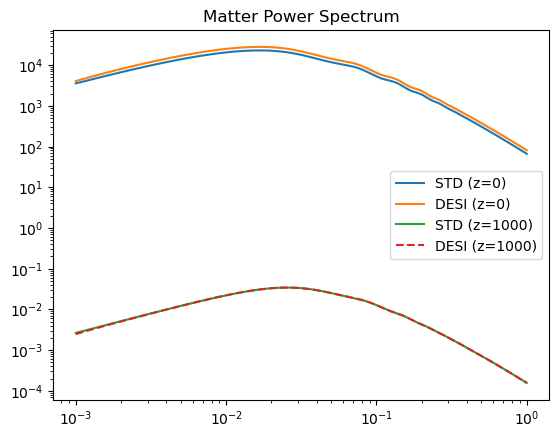

In [83]:
pars.set_matter_power(redshifts=[1000,0], kmax=10.0) #kmax in (Mpc)^-1
pars4.set_matter_power(redshifts=[1000,0], kmax=10.0)
pars.NonLinear = 0
pars4.NonLinear = 0
results = camb.get_results(pars)
results4 = camb.get_results(pars4)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)
kh4, z, pk4 = results4.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)

plt.plot(kh,pk[0],label='STD (z=0)')
plt.plot(kh4,pk4[0],label='DESI (z=0)')
plt.plot(kh,pk[1],label='STD (z=1000)')
plt.plot(kh4,pk4[1],label='DESI (z=1000)',linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Matter Power Spectrum')

At low redshifts DE behaves like standard matter (the green line and the dashed red one are very similar), which grows, so the clustering of the structures is enhanced.